<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/FinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh.csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [94]:
# Show dataset
# split data into training and test datasets
X = df[0:570]
y = X
# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
X = X.drop(['ID'],axis=1)
y = y.drop(['ID'],axis=1)
from sklearn.model_selection import train_test_split
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)


Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [95]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
198         M       19.180  ...          0.3193                  0.09221
476         B       14.200  ...          0.2534                  0.07858
563         M       20.920  ...          0.2929                  0.09873
350         B       11.660  ...          0.2731                  0.06825
193         M       12.340  ...          0.3215                  0.12050
94          M       15.060  ...          0.2834                  0.08234
539         B        7.691  ...          0.2790                  0.10660
95          M       20.260  ...          0.3689                  0.08368
342         B       11.060  ...          0.3301                  0.09080
59          B        8.618  ...          0.3220                  0.09026
531         B       11.670  ...          0.3206                  0.08950
428         B       11.130  ...          0.2383                  0.07083
298         B       14.260  ...          0

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [96]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (513, 31)
y_test set shape:  (513, 31)
X_train shape:  (56, 31)
y_train shape:  (56, 31)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [97]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
X_train['Diagnosis'] = X_train['Diagnosis'].replace({'M':1,'B':0})
y_train['Diagnosis'] = y_train['Diagnosis'].replace({'M':1,'B':0})
X_test['Diagnosis'] = X_test['Diagnosis'].replace({'M':1,'B':0})
y_test['Diagnosis'] = y_test['Diagnosis'].replace({'M':1,'B':0})

# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'


## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [98]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Diagnosis                    0.499350
Mean_Radius                  3.525902
Mean_Texture                 4.386342
Mean_Perimeter              24.275622
Mean_Area                  328.394373
Mean_Smoothness              0.014057
Mean_Compactness             0.057211
Mean_Concavity               0.079702
Mean_Concave_Points          0.039960
Mean_Symmetry                0.031804
Mean_Fractal_Dimension       0.007187
Radius_SE                    0.246520
Texture_SE                   0.457157
Perimeter_SE                 1.919288
Area_SE                     31.193676
Smoothness_SE                0.002623
Compactness_SE               0.016270
Concavity_SE                 0.023071
Concave_Points_SE            0.006713
Symmetry_SE                  0.006561
Fractal_Dimension_SE         0.001637
Worst_Radius                 4.656183
Worst_Texture                6.290715
Worst_Perimeter             32.946698
Worst_Area                 497.021246
Wo

In [99]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  Diagnosis                    0.499350
Mean_Radius                  3.525902
Mean_Texture                 4.386342
Mean_Perimeter              24.275622
Mean_Area                  328.394373
Mean_Smoothness              0.014057
Mean_Compactness             0.057211
Mean_Concavity               0.079702
Mean_Concave_Points          0.039960
Mean_Symmetry                0.031804
Mean_Fractal_Dimension       0.007187
Radius_SE                    0.246520
Texture_SE                   0.457157
Perimeter_SE                 1.919288
Area_SE                     31.193676
Smoothness_SE                0.002623
Compactness_SE               0.016270
Concavity_SE                 0.023071
Concave_Points_SE            0.006713
Symmetry_SE                  0.006561
Fractal_Dimension_SE         0.001637
Worst_Radius                 4.656183
Worst_Texture                6.290715
Worst_Perimeter             32.946698
Worst_Area                 497.021246
Wo

In [100]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Diagnosis                    0.482311
Mean_Radius                  3.527101
Mean_Texture                 4.293656
Mean_Perimeter              24.324535
Mean_Area                  354.671021
Mean_Smoothness              0.014079
Mean_Compactness             0.052312
Mean_Concavity               0.079783
Mean_Concave_Points          0.038705
Mean_Symmetry                0.026896
Mean_Fractal_Dimension       0.007042
Radius_SE                    0.280622
Texture_SE                   0.561287
Perimeter_SE                 2.033595
Area_SE                     46.810722
Smoothness_SE                0.003041
Compactness_SE               0.018090
Concavity_SE                 0.030882
Concave_Points_SE            0.006109
Symmetry_SE                  0.008436
Fractal_Dimension_SE         0.002735
Worst_Radius                 4.856571
Worst_Texture                6.134417
Worst_Perimeter             33.704859
Worst_Area                 577.129767
Wor

In [101]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  Diagnosis                    0.482311
Mean_Radius                  3.527101
Mean_Texture                 4.293656
Mean_Perimeter              24.324535
Mean_Area                  354.671021
Mean_Smoothness              0.014079
Mean_Compactness             0.052312
Mean_Concavity               0.079783
Mean_Concave_Points          0.038705
Mean_Symmetry                0.026896
Mean_Fractal_Dimension       0.007042
Radius_SE                    0.280622
Texture_SE                   0.561287
Perimeter_SE                 2.033595
Area_SE                     46.810722
Smoothness_SE                0.003041
Compactness_SE               0.018090
Concavity_SE                 0.030882
Concave_Points_SE            0.006109
Symmetry_SE                  0.008436
Fractal_Dimension_SE         0.002735
Worst_Radius                 4.856571
Worst_Texture                6.134417
Worst_Perimeter             33.704859
Worst_Area                 577.129767
Wor

## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [102]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.718963,0.590164,0.748290,0.714016,0.450624,0.691589,0.806572,0.848798,0.368120,0.061748,0.620258,0.147192,0.595459,0.697258,-0.023649,0.492419,0.485526,0.543528,-0.083942,0.337851,0.788719,0.622984,0.806620,0.778064,0.474074,0.732958,0.829992,0.877711,0.494937,0.491492
Mean_Radius,0.718963,1.000000,0.461645,0.997222,0.992897,0.100541,0.425790,0.621734,0.777105,0.062836,-0.418678,0.639325,0.093109,0.611552,0.783412,-0.361386,0.212260,0.244194,0.411916,-0.193701,0.028003,0.978696,0.471728,0.968769,0.968042,0.011199,0.412658,0.533238,0.717917,0.139212,0.017384
Mean_Texture,0.590164,0.461645,1.000000,0.480277,0.477899,0.252809,0.472125,0.537598,0.496728,0.188051,0.047373,0.413561,0.402565,0.418557,0.456982,0.131524,0.480066,0.477579,0.382308,-0.001915,0.316852,0.507594,0.926055,0.526952,0.519918,0.318822,0.521537,0.594230,0.506841,0.242014,0.361987
Mean_Perimeter,0.748290,0.997222,0.480277,1.000000,0.990425,0.147277,0.488296,0.672794,0.815552,0.113736,-0.359612,0.677583,0.114407,0.655441,0.814313,-0.329495,0.265181,0.292193,0.458639,-0.179359,0.079156,0.983951,0.488351,0.980911,0.973372,0.053225,0.460293,0.578346,0.758052,0.176434,0.066931
Mean_Area,0.714016,0.992897,0.477899,0.990425,1.000000,0.098499,0.426872,0.636764,0.784396,0.065203,-0.391319,0.656323,0.115531,0.630211,0.799085,-0.312470,0.233174,0.280425,0.430333,-0.163784,0.056821,0.973454,0.480905,0.964036,0.976528,0.020302,0.403074,0.535307,0.711491,0.135912,0.022775
Mean_Smoothness,0.450624,0.100541,0.252809,0.147277,0.098499,1.000000,0.687499,0.503398,0.530112,0.681009,0.612929,0.354027,0.195963,0.358325,0.322634,0.304354,0.421365,0.311173,0.484582,0.207641,0.470341,0.187081,0.277978,0.230673,0.184278,0.802873,0.556804,0.482328,0.563082,0.651191,0.615967
Mean_Compactness,0.691589,0.425790,0.472125,0.488296,0.426872,0.687499,1.000000,0.902124,0.830360,0.718561,0.582449,0.750683,0.360917,0.774404,0.720159,0.258740,0.825208,0.738344,0.776709,0.134836,0.713343,0.521641,0.467758,0.584863,0.517321,0.579309,0.822263,0.809953,0.833016,0.589464,0.671134
Mean_Concavity,0.806572,0.621734,0.537598,0.672794,0.636764,0.503398,0.902124,1.000000,0.928459,0.534929,0.361920,0.790334,0.297141,0.814762,0.809463,0.146029,0.742701,0.793914,0.780787,0.036355,0.611230,0.690657,0.516125,0.741989,0.698801,0.446839,0.756279,0.893141,0.891423,0.451734,0.545869
Mean_Concave_Points,0.848798,0.777105,0.496728,0.815552,0.784396,0.530112,0.830360,0.928459,1.000000,0.501594,0.161314,0.838759,0.253658,0.833207,0.887914,0.060994,0.586157,0.607598,0.770256,0.043561,0.458322,0.826039,0.482996,0.857212,0.825035,0.404239,0.667295,0.782109,0.942427,0.445199,0.390418
Mean_Symmetry,0.368120,0.062836,0.188051,0.113736,0.065203,0.681009,0.718561,0.534929,0.501594,1.000000,0.635357,0.545343,0.278579,0.539909,0.452065,0.390588,0.558194,0.439631,0.579665,0.406263,0.692370,0.149323,0.152772,0.200160,0.145554,0.500745,0.474324,0.392309,0.457268,0.743554,0.524186


In [103]:
y_train.corr(method='pearson')


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.718963,0.590164,0.748290,0.714016,0.450624,0.691589,0.806572,0.848798,0.368120,0.061748,0.620258,0.147192,0.595459,0.697258,-0.023649,0.492419,0.485526,0.543528,-0.083942,0.337851,0.788719,0.622984,0.806620,0.778064,0.474074,0.732958,0.829992,0.877711,0.494937,0.491492
Mean_Radius,0.718963,1.000000,0.461645,0.997222,0.992897,0.100541,0.425790,0.621734,0.777105,0.062836,-0.418678,0.639325,0.093109,0.611552,0.783412,-0.361386,0.212260,0.244194,0.411916,-0.193701,0.028003,0.978696,0.471728,0.968769,0.968042,0.011199,0.412658,0.533238,0.717917,0.139212,0.017384
Mean_Texture,0.590164,0.461645,1.000000,0.480277,0.477899,0.252809,0.472125,0.537598,0.496728,0.188051,0.047373,0.413561,0.402565,0.418557,0.456982,0.131524,0.480066,0.477579,0.382308,-0.001915,0.316852,0.507594,0.926055,0.526952,0.519918,0.318822,0.521537,0.594230,0.506841,0.242014,0.361987
Mean_Perimeter,0.748290,0.997222,0.480277,1.000000,0.990425,0.147277,0.488296,0.672794,0.815552,0.113736,-0.359612,0.677583,0.114407,0.655441,0.814313,-0.329495,0.265181,0.292193,0.458639,-0.179359,0.079156,0.983951,0.488351,0.980911,0.973372,0.053225,0.460293,0.578346,0.758052,0.176434,0.066931
Mean_Area,0.714016,0.992897,0.477899,0.990425,1.000000,0.098499,0.426872,0.636764,0.784396,0.065203,-0.391319,0.656323,0.115531,0.630211,0.799085,-0.312470,0.233174,0.280425,0.430333,-0.163784,0.056821,0.973454,0.480905,0.964036,0.976528,0.020302,0.403074,0.535307,0.711491,0.135912,0.022775
Mean_Smoothness,0.450624,0.100541,0.252809,0.147277,0.098499,1.000000,0.687499,0.503398,0.530112,0.681009,0.612929,0.354027,0.195963,0.358325,0.322634,0.304354,0.421365,0.311173,0.484582,0.207641,0.470341,0.187081,0.277978,0.230673,0.184278,0.802873,0.556804,0.482328,0.563082,0.651191,0.615967
Mean_Compactness,0.691589,0.425790,0.472125,0.488296,0.426872,0.687499,1.000000,0.902124,0.830360,0.718561,0.582449,0.750683,0.360917,0.774404,0.720159,0.258740,0.825208,0.738344,0.776709,0.134836,0.713343,0.521641,0.467758,0.584863,0.517321,0.579309,0.822263,0.809953,0.833016,0.589464,0.671134
Mean_Concavity,0.806572,0.621734,0.537598,0.672794,0.636764,0.503398,0.902124,1.000000,0.928459,0.534929,0.361920,0.790334,0.297141,0.814762,0.809463,0.146029,0.742701,0.793914,0.780787,0.036355,0.611230,0.690657,0.516125,0.741989,0.698801,0.446839,0.756279,0.893141,0.891423,0.451734,0.545869
Mean_Concave_Points,0.848798,0.777105,0.496728,0.815552,0.784396,0.530112,0.830360,0.928459,1.000000,0.501594,0.161314,0.838759,0.253658,0.833207,0.887914,0.060994,0.586157,0.607598,0.770256,0.043561,0.458322,0.826039,0.482996,0.857212,0.825035,0.404239,0.667295,0.782109,0.942427,0.445199,0.390418
Mean_Symmetry,0.368120,0.062836,0.188051,0.113736,0.065203,0.681009,0.718561,0.534929,0.501594,1.000000,0.635357,0.545343,0.278579,0.539909,0.452065,0.390588,0.558194,0.439631,0.579665,0.406263,0.692370,0.149323,0.152772,0.200160,0.145554,0.500745,0.474324,0.392309,0.457268,0.743554,0.524186


### Test set correlation values

In [104]:
X_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.732356,0.394542,0.742983,0.709895,0.348769,0.584313,0.684041,0.768244,0.324597,-0.023644,0.562344,-0.021672,0.551723,0.541411,-0.072968,0.272885,0.235707,0.390464,0.000782,0.061546,0.776062,0.437429,0.781000,0.731475,0.414404,0.573433,0.640670,0.783377,0.410486,0.304205
Mean_Radius,0.732356,1.000000,0.309198,0.997927,0.987067,0.178071,0.516843,0.683061,0.828096,0.159431,-0.299837,0.683750,-0.114350,0.681281,0.736570,-0.209729,0.205723,0.190821,0.373024,-0.097291,-0.047544,0.968712,0.278169,0.964859,0.939486,0.133208,0.414634,0.526622,0.748107,0.166336,0.006463
Mean_Texture,0.394542,0.309198,1.000000,0.313463,0.305815,-0.053572,0.207347,0.276192,0.269925,0.054891,-0.092349,0.262373,0.386603,0.266864,0.247254,-0.006484,0.163232,0.116490,0.136297,0.010619,0.037794,0.336573,0.910412,0.340065,0.327659,0.046780,0.248266,0.268615,0.269750,0.092974,0.091530
Mean_Perimeter,0.742983,0.997927,0.313463,1.000000,0.986371,0.213686,0.566204,0.721102,0.855356,0.192677,-0.250755,0.693927,-0.104625,0.697611,0.744135,-0.191024,0.249648,0.223668,0.402142,-0.073806,-0.011012,0.968077,0.282986,0.969352,0.939479,0.162731,0.456249,0.562656,0.773543,0.190466,0.049737
Mean_Area,0.709895,0.987067,0.305815,0.986371,1.000000,0.184854,0.508014,0.691439,0.828194,0.162558,-0.272146,0.739731,-0.081250,0.736365,0.802887,-0.154053,0.210969,0.202597,0.367392,-0.065685,-0.024577,0.961810,0.268279,0.958844,0.957940,0.135704,0.390384,0.510847,0.724547,0.144212,0.002342
Mean_Smoothness,0.348769,0.178071,-0.053572,0.213686,0.184854,1.000000,0.656942,0.524147,0.556546,0.543816,0.582842,0.296862,0.057337,0.290060,0.242471,0.335643,0.309318,0.244146,0.369149,0.200667,0.273901,0.215811,0.009554,0.239724,0.208972,0.806685,0.463619,0.430050,0.496579,0.371951,0.487634
Mean_Compactness,0.584313,0.516843,0.207347,0.566204,0.508014,0.656942,1.000000,0.881458,0.831441,0.585863,0.562328,0.472103,0.017192,0.523927,0.439633,0.121548,0.731025,0.559763,0.624128,0.240811,0.499654,0.537986,0.220847,0.591737,0.510953,0.563269,0.870988,0.817473,0.813259,0.505076,0.688946
Mean_Concavity,0.684041,0.683061,0.276192,0.721102,0.691439,0.524147,0.881458,1.000000,0.920623,0.496806,0.333480,0.617278,0.057446,0.644674,0.607270,0.093549,0.663497,0.685358,0.672002,0.190646,0.442651,0.688221,0.275716,0.728383,0.674761,0.449117,0.755013,0.883090,0.858034,0.406493,0.511359
Mean_Concave_Points,0.768244,0.828096,0.269925,0.855356,0.828194,0.556546,0.831441,0.920623,1.000000,0.457422,0.166575,0.685003,0.000983,0.697917,0.680514,0.023643,0.481100,0.427087,0.596685,0.100514,0.246793,0.831240,0.270695,0.856072,0.809646,0.458687,0.667358,0.749064,0.906347,0.370343,0.365750
Mean_Symmetry,0.324597,0.159431,0.054891,0.192677,0.162558,0.543816,0.585863,0.496806,0.457422,1.000000,0.458964,0.277106,0.114372,0.286699,0.207923,0.164448,0.407379,0.336963,0.366068,0.458266,0.310421,0.190892,0.081532,0.222095,0.181974,0.415406,0.472140,0.439229,0.426124,0.700508,0.427166


In [105]:
y_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.732356,0.394542,0.742983,0.709895,0.348769,0.584313,0.684041,0.768244,0.324597,-0.023644,0.562344,-0.021672,0.551723,0.541411,-0.072968,0.272885,0.235707,0.390464,0.000782,0.061546,0.776062,0.437429,0.781000,0.731475,0.414404,0.573433,0.640670,0.783377,0.410486,0.304205
Mean_Radius,0.732356,1.000000,0.309198,0.997927,0.987067,0.178071,0.516843,0.683061,0.828096,0.159431,-0.299837,0.683750,-0.114350,0.681281,0.736570,-0.209729,0.205723,0.190821,0.373024,-0.097291,-0.047544,0.968712,0.278169,0.964859,0.939486,0.133208,0.414634,0.526622,0.748107,0.166336,0.006463
Mean_Texture,0.394542,0.309198,1.000000,0.313463,0.305815,-0.053572,0.207347,0.276192,0.269925,0.054891,-0.092349,0.262373,0.386603,0.266864,0.247254,-0.006484,0.163232,0.116490,0.136297,0.010619,0.037794,0.336573,0.910412,0.340065,0.327659,0.046780,0.248266,0.268615,0.269750,0.092974,0.091530
Mean_Perimeter,0.742983,0.997927,0.313463,1.000000,0.986371,0.213686,0.566204,0.721102,0.855356,0.192677,-0.250755,0.693927,-0.104625,0.697611,0.744135,-0.191024,0.249648,0.223668,0.402142,-0.073806,-0.011012,0.968077,0.282986,0.969352,0.939479,0.162731,0.456249,0.562656,0.773543,0.190466,0.049737
Mean_Area,0.709895,0.987067,0.305815,0.986371,1.000000,0.184854,0.508014,0.691439,0.828194,0.162558,-0.272146,0.739731,-0.081250,0.736365,0.802887,-0.154053,0.210969,0.202597,0.367392,-0.065685,-0.024577,0.961810,0.268279,0.958844,0.957940,0.135704,0.390384,0.510847,0.724547,0.144212,0.002342
Mean_Smoothness,0.348769,0.178071,-0.053572,0.213686,0.184854,1.000000,0.656942,0.524147,0.556546,0.543816,0.582842,0.296862,0.057337,0.290060,0.242471,0.335643,0.309318,0.244146,0.369149,0.200667,0.273901,0.215811,0.009554,0.239724,0.208972,0.806685,0.463619,0.430050,0.496579,0.371951,0.487634
Mean_Compactness,0.584313,0.516843,0.207347,0.566204,0.508014,0.656942,1.000000,0.881458,0.831441,0.585863,0.562328,0.472103,0.017192,0.523927,0.439633,0.121548,0.731025,0.559763,0.624128,0.240811,0.499654,0.537986,0.220847,0.591737,0.510953,0.563269,0.870988,0.817473,0.813259,0.505076,0.688946
Mean_Concavity,0.684041,0.683061,0.276192,0.721102,0.691439,0.524147,0.881458,1.000000,0.920623,0.496806,0.333480,0.617278,0.057446,0.644674,0.607270,0.093549,0.663497,0.685358,0.672002,0.190646,0.442651,0.688221,0.275716,0.728383,0.674761,0.449117,0.755013,0.883090,0.858034,0.406493,0.511359
Mean_Concave_Points,0.768244,0.828096,0.269925,0.855356,0.828194,0.556546,0.831441,0.920623,1.000000,0.457422,0.166575,0.685003,0.000983,0.697917,0.680514,0.023643,0.481100,0.427087,0.596685,0.100514,0.246793,0.831240,0.270695,0.856072,0.809646,0.458687,0.667358,0.749064,0.906347,0.370343,0.365750
Mean_Symmetry,0.324597,0.159431,0.054891,0.192677,0.162558,0.543816,0.585863,0.496806,0.457422,1.000000,0.458964,0.277106,0.114372,0.286699,0.207923,0.164448,0.407379,0.336963,0.366068,0.458266,0.310421,0.190892,0.081532,0.222095,0.181974,0.415406,0.472140,0.439229,0.426124,0.700508,0.427166


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

# Creating linear regression model for Area Severity and Smoothness Severity
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the Mean_Radius has a negative impact on the Mean_Fractal_Dimension.  When the smoothness severity value increases then on average the area severity value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  0.00022366751239025245
Coefficient:  [[-0.00085343]]
Intercept:  [0.07591936]
predict  [[-0.05499741]]


(513, 31)

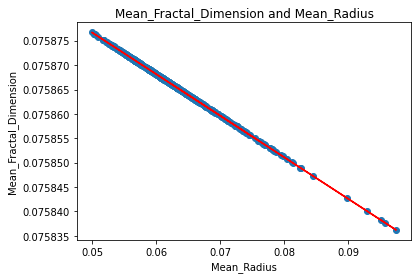

In [166]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Mean_Fractal_Dimension']).reshape(-1,1)
y_trainArray = np.array(y_train['Mean_Fractal_Dimension']).reshape(-1,1)
X_trainArray = np.array(X_train['Mean_Radius']).reshape(-1,1)
X_testArray = np.array(X_test['Mean_Radius']).reshape(-1,1)
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Mean_Radius")
plt.ylabel("Mean_Fractal_Dimension")
plt.title('Mean_Fractal_Dimension and Mean_Radius')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))
y_test.shape


I will demonstrate with some predictions below that the values are negatively skewed.  We will see that whenever we pass in a high fractal dimension the value will be lower and vice versa.

In [184]:
# As we can see not too much of a difference between the values here
print('this value will be low: ', regression_model.predict([[0.5]]))
print('this value will be high: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be low: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the radius the higher the mean fractal dimension
print('this value will be high: ', regression_model.predict([[-100]]))


this value will be low:  [[0.11939575]]
this value will be high:  [[0.02813939]]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be low:  [[22.81941643]]
this value will be high:  [[-22.80876583]]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the negative correlation is around ~ -0.29

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.5963144457288783e-05
Coefficient:  [[0.22814091]]
Intercept:  [0.0053253]


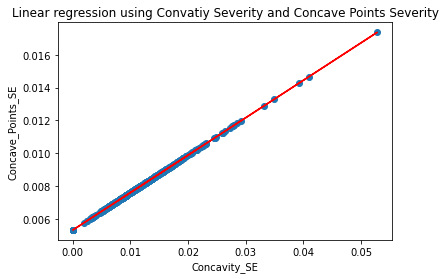

In [181]:
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Concave_Points_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [183]:
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[100]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [[0.11939575]]
this value will be low:  [[0.02813939]]
let's make our model predict some grossly inflated / deflated values
this value will be high:  [[22.81941643]]
this value will be low:  [[0.0053253]]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

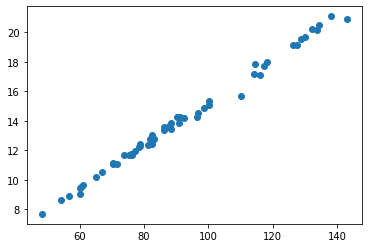

In [110]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


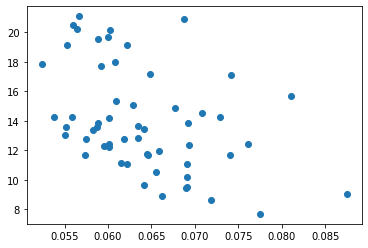

In [111]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [112]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train[['Diagnosis']])
print('Performance on X_test: ',knn.score(X_train,y_train['Diagnosis']))


Performance on X_test:  0.9464285714285714


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [113]:
# Make prediction on testSet
X_predictions = knn.predict(X_test)
y_predictions = knn.predict(y_test)
X_trainPredictions = knn.predict(X_train)
y_trainPredictions = knn.predict(y_train)


In [114]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', X_predictions[count])
  if X_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(X_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', X_trainPredictions[count])
  if X_trainPredictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

In [115]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', y_predictions[count])
  if y_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(y_train['Diagnosis']).reshape(-1,1)

for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', y_trainPredictions[count])
  if y_trainPredictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)



Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below is performing accurately but perhaps it is overfitting which is why I included two Naive Bayes Models in this notebook, the only difference being the number of features.  

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

In [116]:

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Mean_Radius','Mean_Texture','Mean_Perimeter','Mean_Area','Mean_Smoothness','Mean_Compactness','Mean_Concavity','Mean_Concave_Points','Mean_Symmetry','Mean_Fractal_Dimension','Radius_SE','Texture_SE','Perimeter_SE','Area_SE','Smoothness_SE','Compactness_SE','Concavity_SE','Concave_Points_SE']],y_train['Diagnosis'])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
XTrainDiagnosisPrediction = naive_bayes.predict(X_train[['Diagnosis']])
YTrainDiagnosisPrediction = naive_bayes.predict(y_train[['Diagnosis']])


In [117]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XDiagnosisPrediction[count])
  if actualValues[count] == XDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

correct = 0;
count = 0;
actualValues = np.array(X_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XTrainDiagnosisPrediction[count])
  if actualValues[count] == XTrainDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

In [118]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)
correct = 0;
count = 0;
actualValues = np.array(y_train['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', YTrainDiagnosisPrediction[count])
  if actualValues[count] == YTrainDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)

Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

# Second Naive Bayes Model
As we can see the model below has worse performance than the model above, you may be asking why we've included this model, the reason why is that the above model seems to be trained a little too well on our training data and may not be able to predict values outside of our dataset too well.

In [119]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Radius_SE','Texture_SE','Perimeter_SE','Area_SE','Smoothness_SE','Compactness_SE','Concavity_SE','Concave_Points_SE','Mean_Radius','Mean_Texture','Mean_Perimeter','Mean_Area']],y_train[['Diagnosis']])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Texture_SE']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Texture_SE']])

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

In [121]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XDiagnosisPrediction[count])
  if XDiagnosisPrediction[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic